In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [12]:
df = pd.read_csv(r"C:\Users\jhank\Desktop\DA7\Projects\wego-shut_up_and_take_my_query\data\Headway Data.csv")
#df = pd.read_csv(r"/home/jwhankins177/projects/wego/data/Headway Data.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [14]:
df.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [15]:
route_info = df[['ROUTE_ABBR','OVERLOAD_ID','HDWY_DEV','ADJUSTED_LATE_COUNT','DWELL_IN_MINS']]
route_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 5 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ROUTE_ABBR           int64  
 1   OVERLOAD_ID          int64  
 2   HDWY_DEV             float64
 3   ADJUSTED_LATE_COUNT  int64  
 4   DWELL_IN_MINS        float64
dtypes: float64(2), int64(3)
memory usage: 75.6 MB


In [16]:
route_info['DWELL_IN_MINS'] = round(route_info['DWELL_IN_MINS'])

C:\Users\jhank\AppData\Local\Temp\ipykernel_22956\3009095329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_info['DWELL_IN_MINS'] = round(route_info['DWELL_IN_MINS'])


In [17]:
route_info.head(10)

,ROUTE_ABBR,OVERLOAD_ID,HDWY_DEV,ADJUSTED_LATE_COUNT,DWELL_IN_MINS
0,7,0,1.983333,0,13.0
1,7,0,3.333333,0,0.0
2,7,0,NaN,1,22.0
3,50,0,NaN,0,6.0
4,50,0,NaN,0,0.0
5,22,0,NaN,0,12.0
6,22,0,NaN,0,0.0
7,22,0,NaN,0,0.0
8,22,0,NaN,0,0.0
9,22,0,NaN,0,11.0


In [18]:
route_info['OVERLOAD_ID'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [19]:
ri_overload = route_info.groupby(['OVERLOAD_ID'],as_index = False)['HDWY_DEV','ADJUSTED_LATE_COUNT','DWELL_IN_MINS'].mean()

C:\Users\jhank\AppData\Local\Temp\ipykernel_22956\2064056450.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ri_overload = route_info.groupby(['OVERLOAD_ID'],as_index = False)['HDWY_DEV','ADJUSTED_LATE_COUNT','DWELL_IN_MINS'].mean()


In [20]:
ri_overload['DWELL_IN_MINS'] = ri_overload['DWELL_IN_MINS'].round(2)

In [21]:
ri_overload.head()

,OVERLOAD_ID,HDWY_DEV,ADJUSTED_LATE_COUNT,DWELL_IN_MINS
0,0,0.368416,0.103376,2.87
1,1,-0.214941,0.468124,1.02
2,2,-0.187011,0.357232,1.51
3,3,-0.613367,0.256445,1.90
4,4,-0.553265,0.084615,2.56


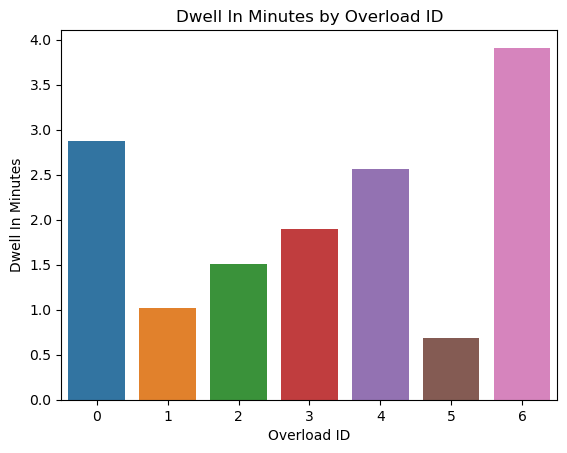

In [25]:
sns.barplot(y = "DWELL_IN_MINS", x = 'OVERLOAD_ID',
            data=ri_overload).set(title = 'Dwell In Minutes by Overload ID',xlabel='Overload ID',ylabel='Dwell In Minutes')
sns.color_palette = ['Paried']